## **Problem statement** -

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for
Forecasting.

## **1 - Cocacola_sales - csv**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import sqrt

from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
coca = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx', header=0, parse_dates=True)
coca.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# EDA

In [ ]:
coca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
coca.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [ ]:
coca.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [ ]:
# we will extract quarter values and year values from 'Quarter' column

coca['Quarters'] = 0
coca['Year'] = 0
for i in range(42):
  p = coca['Quarter'][i]
  coca['Quarters'][i] = p[0:2]
  coca['Year'][i] = p[3:5]

In [ ]:
coca.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [ ]:
# dummy variables for quarters Q1,Q2,Q3,Q4
quarters_dummies = pd.DataFrame(pd.get_dummies(coca['Quarters']))

In [ ]:
coca = pd.concat([coca, quarters_dummies], axis=1)

In [ ]:
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


In [ ]:
## Visualization of Data Checking the line plot,Histogram and Density Plots,create a density plot,
## Box and Whisker Plots by Interval,Lag Plot, Autocorrelation Plot

<Axes: >

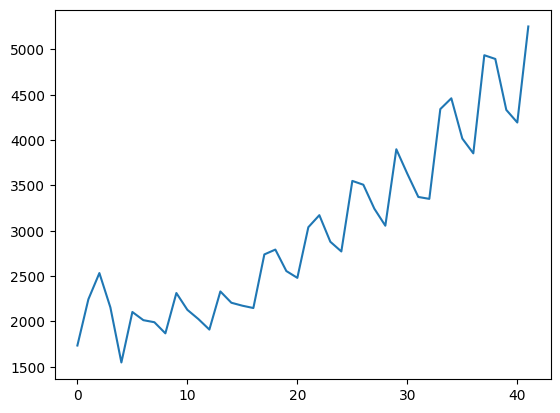

In [ ]:
# line plot
coca.Sales.plot()

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Q1'}>],
       [<Axes: title={'center': 'Q2'}>, <Axes: title={'center': 'Q3'}>],
       [<Axes: title={'center': 'Q4'}>, <Axes: >]], dtype=object)

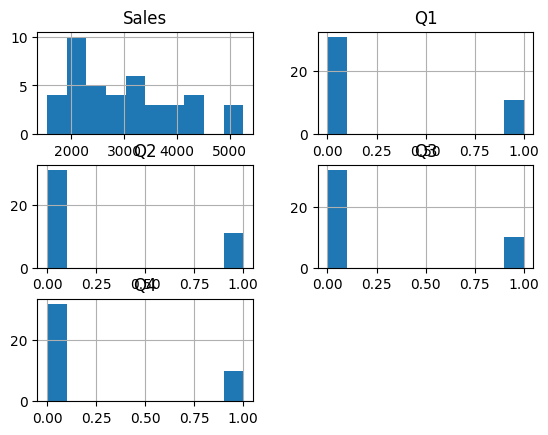

In [ ]:
# Histogram
coca.hist()

<Axes: >

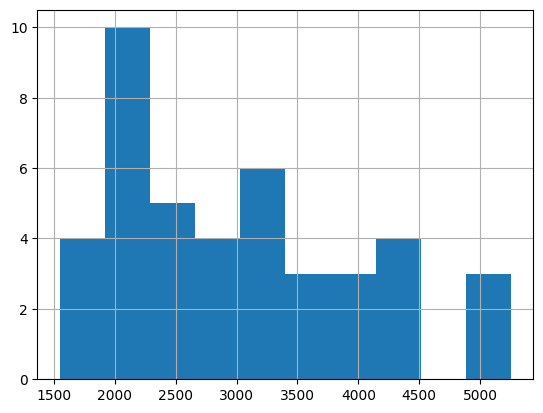

In [ ]:
coca.Sales.hist()

<Axes: ylabel='Density'>

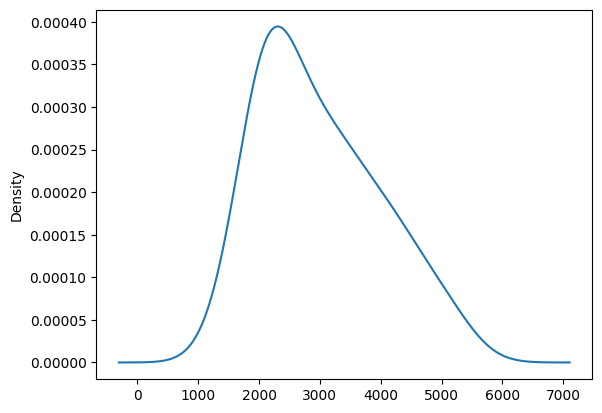

In [ ]:
coca.Sales.plot(kind='kde')

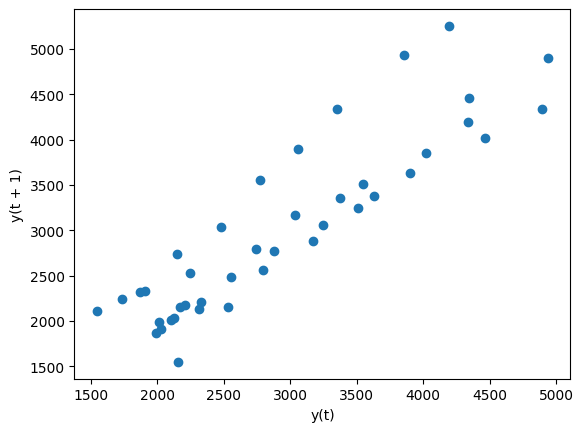

In [ ]:
# lag plot
lag_plot(coca.Sales)
plt.show()

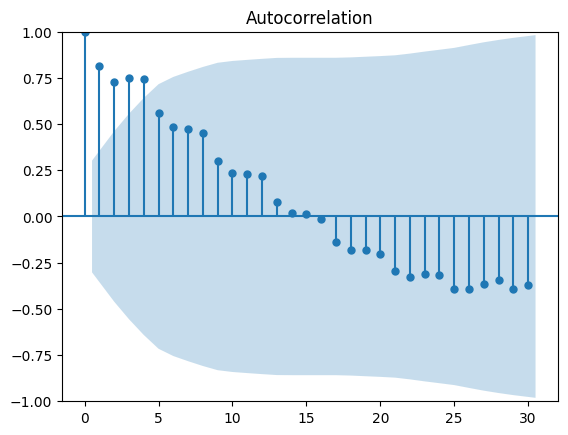

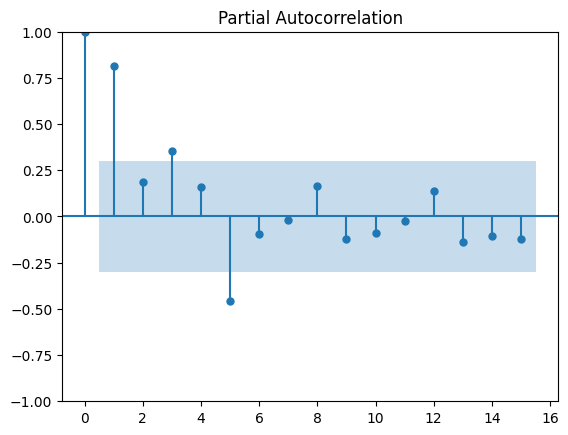

In [ ]:
## Autocorrelation plot
tsa_plots.plot_acf(coca.Sales, lags=30)
tsa_plots.plot_pacf(coca.Sales, lags=15)
plt.show()

<Axes: xlabel='Quarters', ylabel='Sales'>

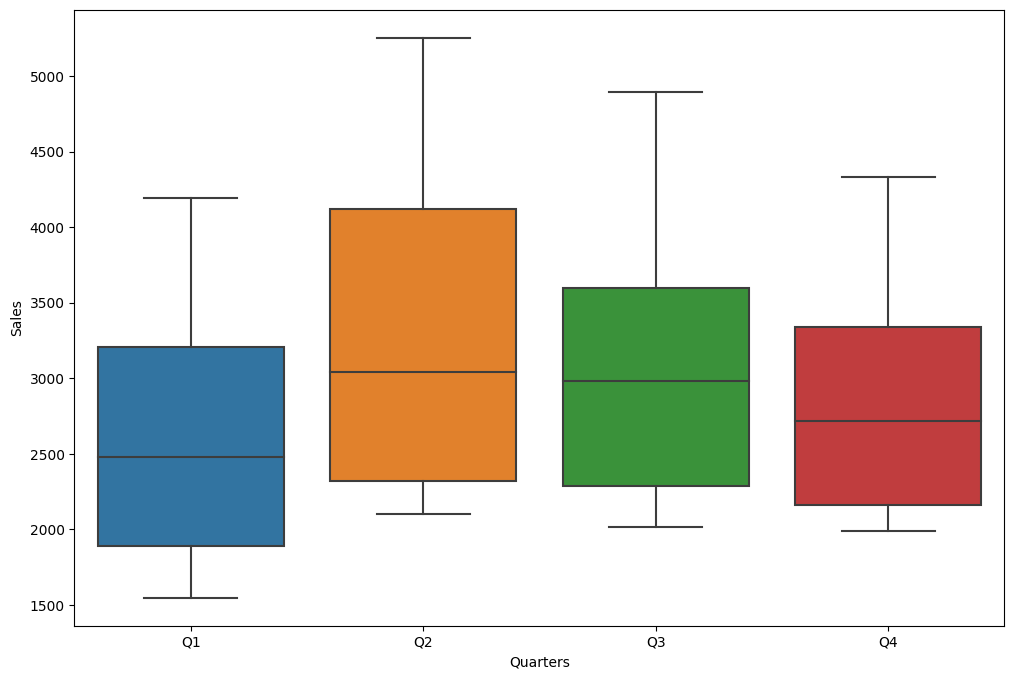

In [ ]:
# Boxplot
plt.figure(figsize=(12,8))
plt.subplot()
sns.boxplot(x='Quarters', y ='Sales', data=coca)

In [ ]:
# Data Preprocessing for models
coca['t'] = np.arange(1,43)
coca['t_squared'] = coca['t']*coca['t']
coca['log_sales'] = np.log(coca['Sales'])
coca.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


<Axes: xlabel='Year', ylabel='Sales'>

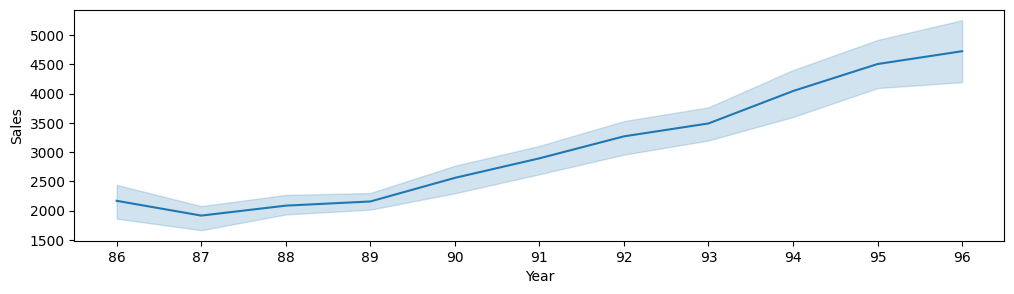

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Sales",data=coca)

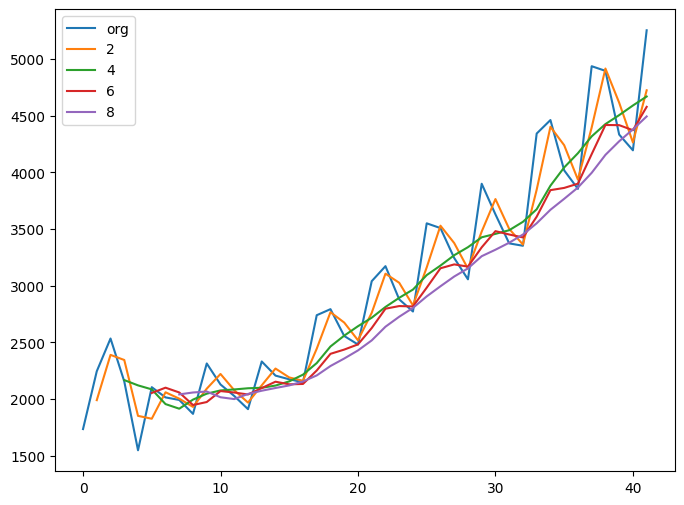

In [ ]:
# Moving Average
plt.figure(figsize=(8,6))
coca.Sales.plot(label="org")
for i in range(2,10,2):
    coca["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

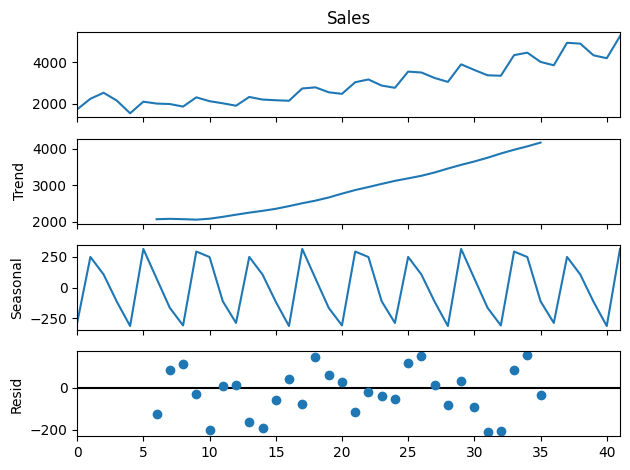

In [ ]:
# Time coca Decomposition Plot
decompose_ts_add = seasonal_decompose(coca.Sales,period=12)
decompose_ts_add.plot()
plt.show()

In [ ]:
# splitting data into train, and test
train = coca.head(32)
test = coca.tail(10)

In [ ]:
# Linear Model
linear_model = smf.ols('Sales~t', data=train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

752.9233932767116

In [ ]:
# Exponential Model
Exp = smf.ols('log_sales~t', data=train).fit()
pred_exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

590.3316432076487

In [ ]:
# Quadratic
Quad = smf.ols('Sales~t+t_squared',data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

457.735735540752

In [ ]:
# Additive seasonality
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1850.466546185836

In [ ]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

277.3510771128639

In [ ]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1908.2503948361164

In [ ]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

448.86781826918514

In [ ]:
data = {"MODEL":pd.Series(['Linear','Exponential','Quadratic','Additive Seas','Additive Seas Quad','Multiplicative Seas']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
4,Additive Seas Quad,277.351077
2,Quadratic,457.735736
1,Exponential,590.331643
0,Linear,752.923393
3,Additive Seas,1850.466546
5,Multiplicative Seas,1908.250395


## **2.Airlines.csv**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import sqrt

from pandas.plotting import lag_plot
import statsmodels.graphics.tsaplots as tsa_plots

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [ ]:
airline = pd.read_excel('/content/Airlines+Data.xlsx', header = 0,index_col=0,parse_dates=True)
airline.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# EDA

In [ ]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [ ]:
airline.isnull().sum()

Passengers    0
dtype: int64

In [ ]:
airline.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Visualization of Data

<Axes: xlabel='Month'>

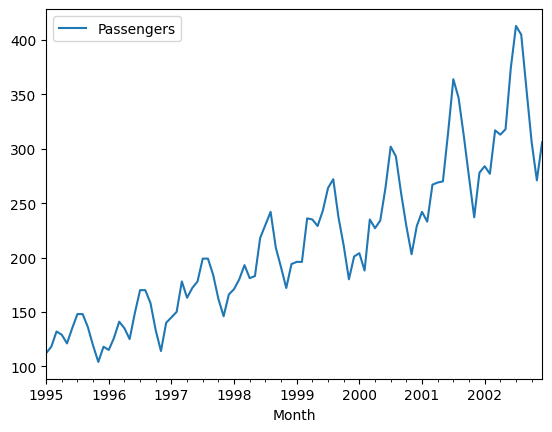

In [ ]:
# line plot
airline.plot()

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

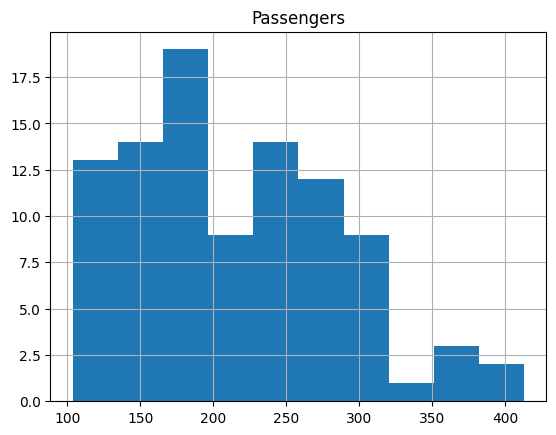

In [ ]:
# Histogram
airline.hist()

<Axes: ylabel='Density'>

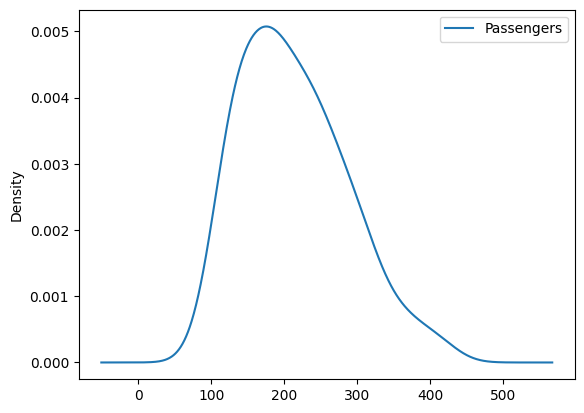

In [ ]:
airline.plot(kind='kde')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

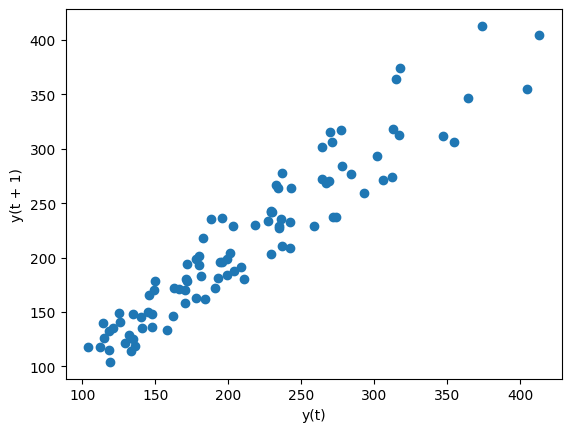

In [ ]:
# lag plot
lag_plot(airline)

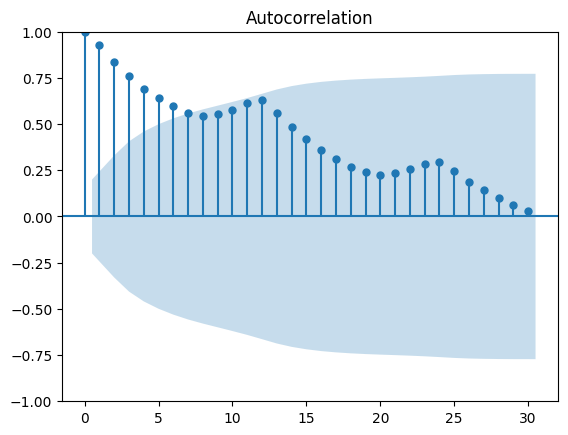

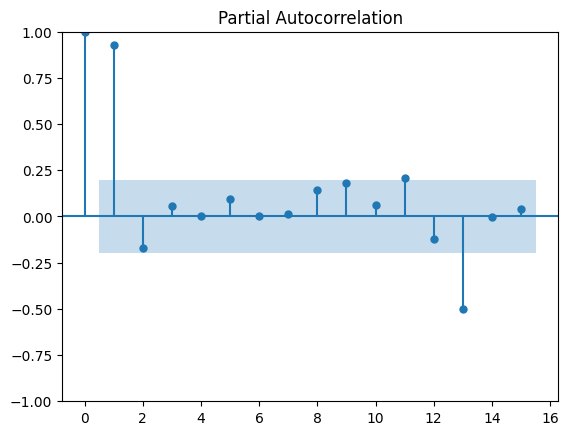

In [ ]:
## Autocorrelation plot
tsa_plots.plot_acf(airline, lags=30)
tsa_plots.plot_pacf(airline, lags=15)
plt.show()

# Square Transformation

In [ ]:
upsampled = airline.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


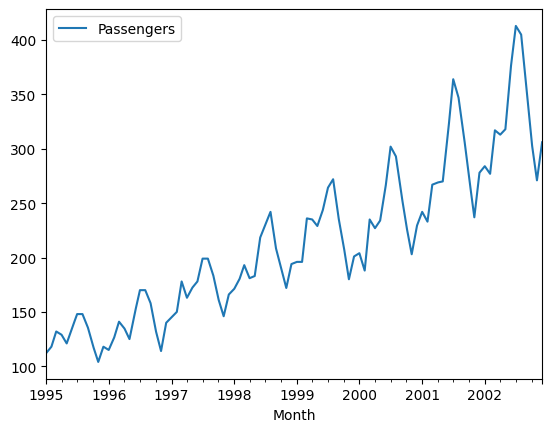

In [ ]:
# Interplot the missing values
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
plt.show()


In [ ]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


(array([420., 391., 574., 309., 436., 328., 210.,  86.,  69.,  69.]),
 array([104. , 134.9, 165.8, 196.7, 227.6, 258.5, 289.4, 320.3, 351.2,
        382.1, 413. ]),
 <BarContainer object of 10 artists>)

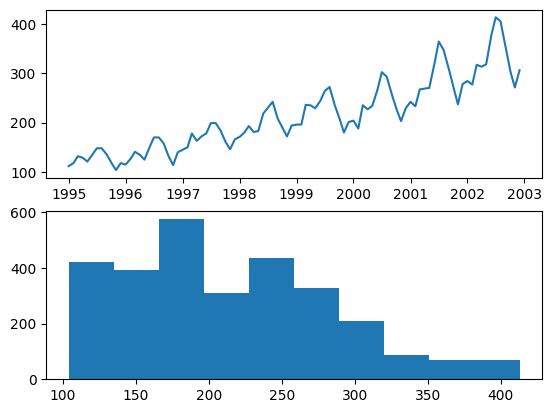

In [ ]:
# line plot
plt.subplot(211)
plt.plot(interpolated)
# histogram
plt.subplot(212)
plt.hist(interpolated)

# Square Root Transform

In [ ]:
dataframe = pd.DataFrame(interpolated)
dataframe.columns = ['Passengers']
dataframe['Passengers'] = np.sqrt(dataframe['Passengers'])

(array([245., 424., 325., 499., 319., 362., 350., 183., 104.,  81.]),
 array([10.19803903, 11.21047527, 12.22291151, 13.23534775, 14.24778399,
        15.26022023, 16.27265647, 17.28509271, 18.29752895, 19.30996519,
        20.32240143]),
 <BarContainer object of 10 artists>)

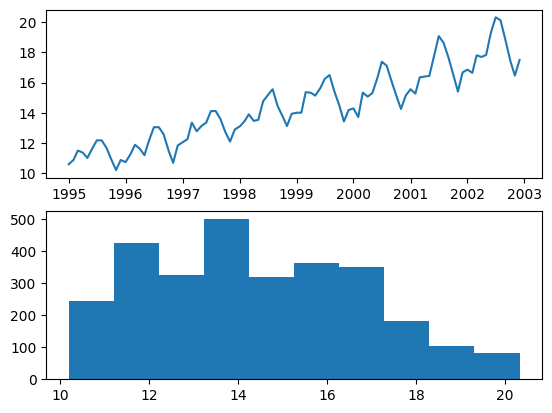

In [ ]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])

In [ ]:
interpolated

,Passengers
Month,
1995-01-01,10.583005
1995-01-02,10.592146
1995-01-03,10.601278
1995-01-04,10.610403
1995-01-05,10.619519
...,...
2002-11-27,17.358955
2002-11-28,17.392527
2002-11-29,17.426034


# log transform

In [ ]:
dataframe = pd.DataFrame(interpolated)
dataframe.columns=['Passengers']
dataframe['Passengers'] = np.log(dataframe['Passengers'])

(array([154., 297., 276., 335., 475., 411., 355., 291., 191., 107.]),
 array([2.32219545, 2.39114828, 2.46010112, 2.52905395, 2.59800679,
        2.66695962, 2.73591246, 2.80486529, 2.87381813, 2.94277096,
        3.0117238 ]),
 <BarContainer object of 10 artists>)

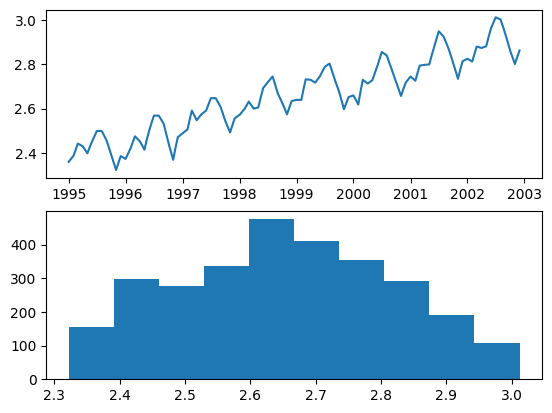

In [ ]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])

In [ ]:
interpolated

,Passengers
Month,
1995-01-01,2.359249
1995-01-02,2.360113
1995-01-03,2.360975
1995-01-04,2.361835
1995-01-05,2.362694
...,...
2002-11-27,2.854109
2002-11-28,2.856041
2002-11-29,2.857965


In [ ]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


In [ ]:
Airline = pd.read_excel('/content/Airlines+Data.xlsx')
Airline.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
Airline['Date'] = pd.to_datetime(Airline.Month, format='%b-%y')
Airline['Months'] = Airline.Date.dt.strftime('%b')
Airline['Year'] = Airline.Date.dt.strftime('%Y')

<Axes: xlabel='Months', ylabel='Passengers'>

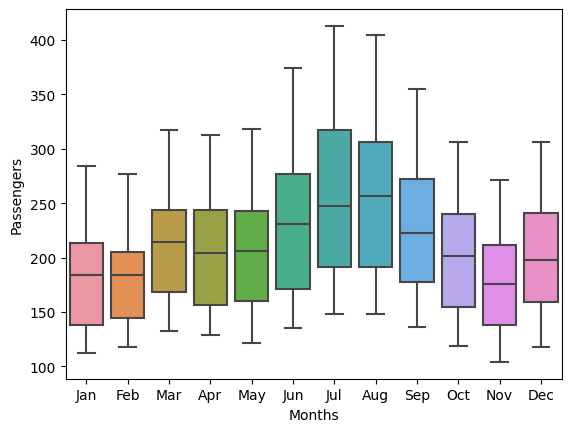

In [ ]:
# boxplot
sns.boxplot(x='Months', y='Passengers', data=Airline)

<Axes: xlabel='Year', ylabel='Passengers'>

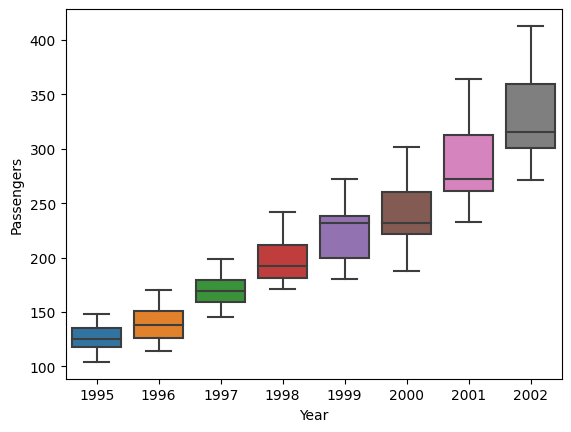

In [ ]:
sns.boxplot(x='Year', y='Passengers', data=Airline)

In [ ]:
Month_Dummies = pd.DataFrame(pd.get_dummies(Airline['Months']))
airline = pd.concat([Airline, Month_Dummies], axis = 1)

In [ ]:
airline['t'] = np.arange(1,97)
airline['t_squared'] = airline['t']*airline['t']
airline['log_passengers'] = np.log(airline['Passengers'])

In [ ]:
airline.head()

,Month,Passengers,Date,Months,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_passengers
0,1995-01-01,112,1995-01-01,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995-02-01,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995-03-01,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995-04-01,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995-05-01,May,1995,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791


<Axes: xlabel='Year', ylabel='Passengers'>

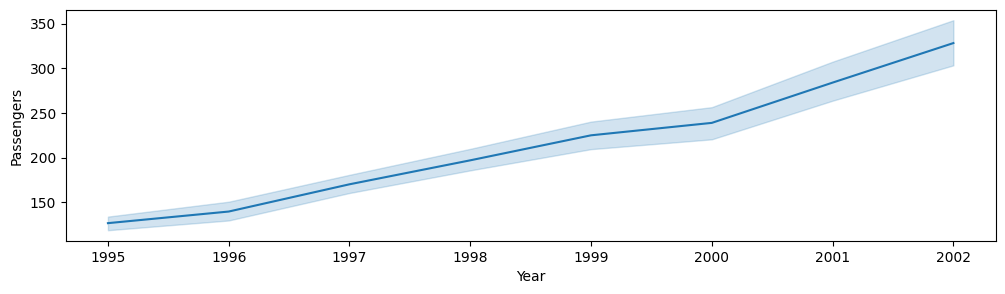

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Year",y="Passengers",data=airline)

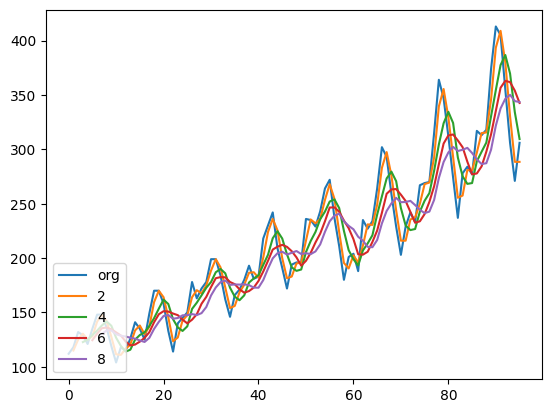

In [ ]:
airline.Passengers.plot(label="org")
for i in range(2,10,2):
    airline["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

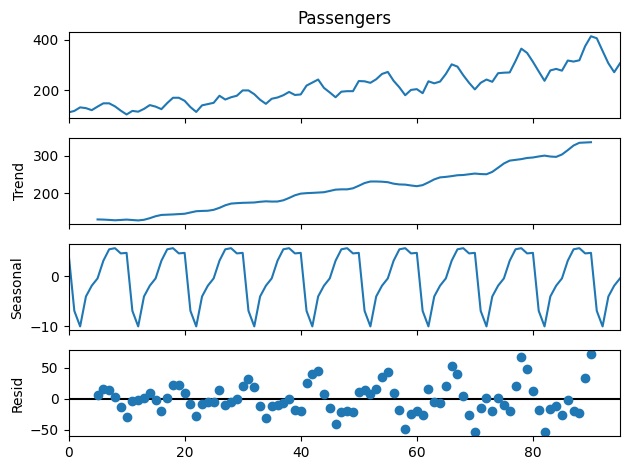

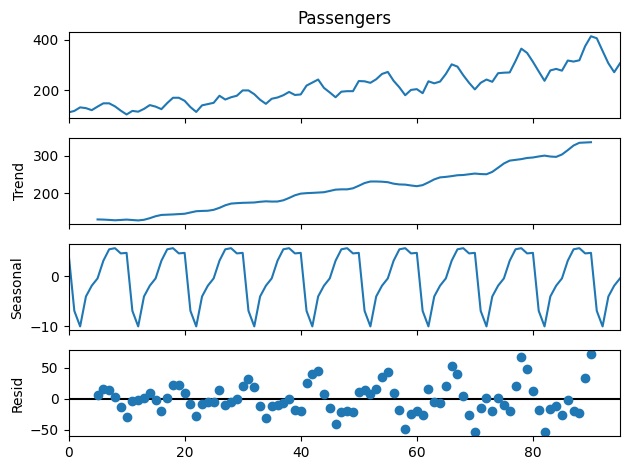

In [ ]:
seasonal_ts_add=seasonal_decompose(airline["Passengers"], period=10)
seasonal_ts_add.plot()

In [ ]:
# splitting data into train and test
Train = airline.head(80)
Test = airline.tail(16)

## Build Model and RMSE values

In [ ]:
# Linear Model
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

In [ ]:
# Exponential Model
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

In [ ]:
# Quadratic Model
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

43.65440369584204

In [ ]:
# Additive seasonality
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

129.2664764144331

In [ ]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

135.32648414621102

In [ ]:
# Multiplicative addditive seasonality
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

9.46900023030625

In [ ]:
data = {"MODEL":pd.Series(['Linear','Exponential','Quadratic','Additive Seas','Additive Seas Quad','Multiplicative Seas', 'Mul.Additive Seas']),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(["RMSE_Values"])

,MODEL,RMSE_Values
6,Mul.Additive Seas,9.469000
2,Quadratic,43.654404
0,Linear,47.542624
3,Additive Seas,129.266476
5,Multiplicative Seas,135.326484
4,Additive Seas Quad,277.351077
1,Exponential,590.331643


In [ ]:
# Multiplicative Additive Seasonality gives the best prediction of least RMSE of 9.46